# Incomplete Data 

Creating accurate predictions is one of the most valuable skills in the job market today. Statisticians, economists, and data scientists use data gathered from specific populations in order to make predictions about what behaviors are likely to occur in the future, or what the truth is about what has already occured. Through computational and statistical techniques, we can make _statistical inferences_ to draw conclusions from data that are often incomplete.

As far as estimations of parameters that already exist, having full population data would mean that our questions about that population are answered. But because the cost of gathering full population would, usually, outweigh the benefit of having perfectly accurate data, we are okay with using incomplete samples to make inferences. 

## Are Mutual Funds better than Broad-market index funds? 

The term “index fund” refers to the investment approach of a fund. Specifically, it is a fund that that aims to match the performance of a particular market index, such as the S&P 500 or Russell 2,000. The index fund simply tries to match the market. This differs from a more actively managed fund, in which investments are picked by a fund manager in an attempt to beat the market. The age old question is: are the fees payed to an actively-managed mutual fund worth it? 

We could simply compare the mean return from a given date range for a mutual fund and compare it to the S&P500s mean return from the same time interval, and see which is higher. But the fact that mutual funds have a finite number of time intervals which we can sample means we cannnot rule out the possibility that higher or lower returns from the fund were a result of random variation, and not an indicator of the true quality of the fund. The S&P500 is , essentially, the market. We know all of the information we need about it, because it isnt a sample. The mutual fund data, on the other hand, is incomplete. So, we need to analyze the two funds using statistical techniques which account for random variation that is possible from incomplete data. 

We would like to ananlyze which(if any) mutual funds have out-performed the market, fees included. To start, we read the CSV downloaded from [Stock Market MBA](https://stockmarketmba.com/listoftop100activelymanagedusstockmutualfunds.php), which shows the 100 largest actively-managed mutual funds in the US. 

In [1]:
import numpy as np
import pandas as pd

mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
to_drop = ["Category2", "Category1","Category3", "Morningstar Category", "Morningstar Rating","Current yield", "Action"]
mutual_fund_data = mutual_fund_data.drop(columns=to_drop)

In [2]:
mutual_fund_data

,Symbol,Name,Market cap,Fees
0,AGTHX,American Funds The Growth Fund of America Class A,"$138,592,080,000",0.62%
1,FCNTX,Fidelity Contrafund Fund,"$121,762,870,000",0.74%
2,CWMAX,American Funds Washington Mutual Investors Fun...,"$113,300,000,000",0.63%
3,CWMCX,American Funds Washington Mutual Investors Fun...,"$113,300,000,000",1.40%
4,CWMEX,American Funds Washington Mutual Investors Fun...,"$113,300,000,000",0.87%
...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,"$9,600,000,000",0.51%
96,FDYZX,Franklin DynaTech Fund Advisor Class,"$9,600,000,000",0.62%
97,BBVLX,Bridge Builder Large Cap Value Fund,"$9,500,000,000",0.25%
98,PEYAX,Putnam Large Cap Value Fund Class A,"$9,393,340,000",0.91%


In [3]:
import pandas_datareader as web
import datetime as dt

mutual_fund_dict = {}
symbols = mutual_fund_data["Symbol"].iloc[0:25]
# will only analyze the first 25 funds for now, but this should illustrate how to do it for any fund 
start= dt.datetime(1970, 1, 1)
end = dt.datetime.today()
for symbol in symbols: 
    #pull mutual fund data for the longest timeframe avaliable, and cpnvert to monthly percent change data 
    fund_data = web.DataReader(symbol, 'yahoo', start, end)["Adj Close"].resample('M').first().pct_change().dropna()
    mutual_fund_dict[symbol] = fund_data
    

In [6]:
mutual_fund_dict = pd.DataFrame(mutual_fund_dict)
mutual_fund_dict

,AGTHX,FCNTX,CWMAX,CWMCX,CWMEX,CWMFX,AIVSX,AWSHX,ANCFX,AMCFX,...,TRBCX,AFMFX,AMRFX,CMLAX,CMLCX,CMLEX,CMLFX,FDGRX,FBGRX,AMCPX
Date,,,,,,,,,,,,,,,,,,,,,
1980-02-29,0.116279,-0.009675,NaN,NaN,NaN,NaN,NaN,0.098214,0.093446,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,-0.020833,-0.025755,NaN,NaN,NaN,NaN,NaN,-0.038408,-0.043146,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,-0.122341,-0.078395,NaN,NaN,NaN,NaN,NaN,-0.087019,-0.071526,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,0.015151,0.012858,NaN,NaN,NaN,NaN,NaN,-0.029032,0.017443,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,0.074627,0.079102,NaN,NaN,NaN,NaN,NaN,0.065790,0.063125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.037124,0.047804,0.002033,0.001405,0.001794,0.002087,0.018495,0.001938,0.012485,0.035463,...,0.064318,0.006452,0.006593,0.006390,0.005566,0.006041,0.006419,0.073322,0.066842,0.035319
2021-08-31,0.008117,0.014854,0.006620,0.005941,0.006485,0.006824,0.005373,0.006781,0.007570,0.012927,...,0.019038,0.005157,0.004957,0.004770,0.004392,0.004791,0.004961,0.004467,0.005453,0.012818
2021-09-30,0.039335,0.050183,0.021685,0.021117,0.021478,0.021937,0.033254,0.021624,0.026943,0.037830,...,0.045028,0.019140,0.018942,0.018789,0.017889,0.018478,0.018760,0.048653,0.046416,0.037506


To start, you formulate your __hypotheses__. These are mutually exclusive, falsifiable statements. Only one can be true, and one of them will be true. We create these two hypotheses: 

- The _null_ hypothesis $H_o$: The true means of the the sample populations do not differ.
- The _alternate_ hypothesis $H_a$: The true means of the sample populations do differ.

### 4 Steps of Hypothesis Testing

All hypotheses are tested using a four-step process:

1. State the two hypotheses so that only one can be right. 
2. Formulate an analysis plan, which outlines how the data will be evaluated.
3. Carry out the plan and physically analyze the sample data.
4. Analyze the results and either reject the null hypothesis, or state that the null hypothesis is plausible, given the data.

Hypothesis testing can be done mentally. It would be burdensome to have to state your _null_ and _alternate_ hypotheses, and run through these four steps explicitly every time you made a predictive computer model. The point is that in means testing, there is a clear process and result that deliniates "Yes, the true means of these samples are different" and "No, they're not significantly different"

In the case of us determining the efficacy of our company's marketing campaign, these are our hypotheses: 

- $H_o$: There is no difference between the mutual fund's and S&P500's average monthly return. 
- $H_a$: The mutual funds have a higher mean gain than the S&P500. 

## Measures of Central Tendency and Dispersion
##### Mean, Median, Mode , and Degrees of Freedom
For a given dataset, useful descriptive statistics of central tendency include mean, median, and mode, which we built as functions in chapter 3. 
- The **Mean** gives the expected value for a given data point by summing all of the observations and dividing by the number of them. 
    - The population mean is denoted as $\mu$. This is if we have all of the data from our population of interest. 
    - If $\mu$ is unknown(which is more common), and we have only a _sample_ of data drawn randomly from a population, we use $\bar{X}$ as an _estimator_ of $\mu$. One must keep in mind that each sample mean $\bar{x_i}$ drawn from the same population is likely to vary; consequently, some degree of uncertainty is involved with $\bar{X}$
        - Note that $\bar{X}$ refers to the *random variable* representing the mean of a sample, which could take on any *individual* values $\bar{x_i}$, due to sampling uncertainty. $x_i$ (without the bar) is an individual datapoint. In both cases, $i$ represents an integer denoting the current iteration of the value at $i = 1,2,3,...$.
    <h3 align="center">
    <font size="4">
         $\bar{X} = \frac{1}{n}\sum_{i=1}^nx_i$
    </font>
    </h3> 
    
    
- The degree to which $\bar{X}$, and any statistical population parameter estimator produced from a sample, is allowed to vary, is the **Degrees of Freedom** of the sample. This is the number of independent pieces of information that go into the estimate of a parameter(sample size $n$), minus the number of parameters used as intermediate steps in the estimation of the parameter itself. So if we estimate $\bar{x}$ once: 
    <h3 align="center">
    <font size="4">
        $ df = n - 1$
    </font>
    </h3> 
    
    
- The **Median** is less sensitive to outliers than mean; it is the value in the middle of the dataset
- The **Mode** is the value which occurs the most in the dataset, in a distribution it is the top of the curve 
     - _Consider this : in 2020, the real **Median** personal income in the United States was \$35,805, and the real **Mean** personal income was \$53,996. Why might these measures be so different?_

In [772]:
from datlib.stats import *
monthly_returns_dict = {}
keys = mutual_fund_dict.keys()
for key in mutual_fund_dict[keys]:
    monthly_returns_dict[key] = mean(mutual_fund_dict[key].dropna())
monthly_returns_dict


{'AGTHX': 0.01069259563809822,
 'FCNTX': 0.010966835181465281,
 'CWMAX': 0.007922703494326801,
 'CWMCX': 0.00728171243286553,
 'CWMEX': 0.007562432306172594,
 'CWMFX': 0.007855042049941505,
 'AIVSX': 0.008431981007494989,
 'AWSHX': 0.009658468608270137,
 'ANCFX': 0.010208593741004095,
 'AMCFX': 0.01195054528121227,
 'CAFAX': 0.009020721008536415,
 'CAFCX': 0.008441664797595201,
 'CAFEX': 0.008673488811225366,
 'CAFFX': 0.009060070655118874,
 'FMACX': 0.015033423562088572,
 'TRBCX': 0.010883010463358501,
 'AFMFX': 0.010533509559308287,
 'AMRFX': 0.00924842364928624,
 'CMLAX': 0.007421057590952049,
 'CMLCX': 0.0067361540116314175,
 'CMLEX': 0.006937386169792503,
 'CMLFX': 0.007311976467308957,
 'FDGRX': 0.012863884314410236,
 'FBGRX': 0.011923959318172504,
 'AMCPX': 0.008616364364132077}

These values will be compared to the monthly returns of the stock market: 

In [26]:
sp500 = web.DataReader('^GSPC', 'yahoo', start, end)['Adj Close'].resample('M').first().pct_change().dropna()
sp500 = pd.DataFrame(sp500)
mean_sp500_gain = mean(sp500['Adj Close'])
print('SP500 average monthly gain since 1970: '+str(mean_sp500_gain*100)+'%'
     +'\nAverage Yearly Gain: '+str((((1.0+mean_sp500_gain)**12)-1.0)*100)+'%')
sp500

SP500 average monthly gain since 1970: 0.7329343028957578%
Average Yearly Gain: 9.158565339306612%


,Adj Close
Date,
1970-02-28,-0.077957
1970-03-31,0.046181
1970-04-30,0.004013
1970-05-31,-0.095814
1970-06-30,-0.044204
...,...
2021-07-31,0.028058
2021-08-31,0.015560
2021-09-30,0.031211


###### Variance, Standard Deviation, and Standard Error
After knowing where the center of a dataset lies, the next important measure is one that tells us how spread out the data is. We previously reviewed these measures in chapter 3. Standard error is the only new function and it is simly the standard deviation of a sampling distribution: 

- **Variance** quantifies the amount of variability around the mean of a dataset by adding together the square of the distance of each individual observation of $x$ from its sample mean $\bar{x}$. It is denoted $\sigma^2$ if population-level data (mean $\mu$) is known and $s^2$ if it is a sample from an unfamiliar population: 
<h3 align="center">
    <font size="4">
        $ s^2 = \frac{1}{(n-1)}\sum_{i=1}^n (x_i - \bar{x})^2$
    </font>
    </h3> 
    
    
- **Standard Deviation** is the positive square root of the variance for a set of data. It is used much more often in data analysis than variance, primarily because it has the same units of measurement as the mean. It corrects the squaring of individual observations deviations from the mean done when calculating variance. It is denoted $s$ when working with a sample with an unknown population mean $\mu$. $s$ is an _estimator_ of $\sigma$, which is standard deviation when $\mu$ is known: 
<h3 align="center">
    <font size="4">
        $ s = \sqrt{s^2}$
    </font>
    </h3> 


- **Standard Error** describes how likely a given random sample mean $\bar{x_i}$ is to deviate from the population mean $\mu$. It is the standard deviation of the probability distribution for the random variable $\bar{X}$, which represents all possible samples of a single given sample size $n$. As $n$ increases, $\bar{X}$ can be expected to deviate less from $\mu$, so standard error decreases. Because population standard deviation $\sigma$ is rarely given, we again use an _estimator_ for standard error, denoted $s_\bar{x}$. Populational data has no standard error as $\mu$ can only take on a single value. 
<h3 align="center">
    <font size="4">
        $ s_\bar{x} = \frac{s}{\sqrt{n}}$
    </font>
    </h3> 



In [87]:
# import previously constructed datlib.stats file

from datlib.stats import *
import numpy as np

mutual_fund_stats_dict = gather_statistics(
        mutual_fund_dict[keys], sample=True)

C:\Users\jzach\ECON411\ZJ_Edited_Learn-Python-for-Stats-and-Econ\datlib\stats.py:120: RuntimeWarning: overflow encountered in double_scalars
  skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)


In [90]:
mutual_fund_stats_dict.replace([np.NaN, -np.inf, np.inf], np.NaN)

,AGTHX,FCNTX,CWMAX,CWMCX,CWMEX,CWMFX,AIVSX,AWSHX,ANCFX,AMCFX,...,TRBCX,AFMFX,AMRFX,CMLAX,CMLCX,CMLEX,CMLFX,FDGRX,FBGRX,AMCPX
mean,0.011,0.011,0.008,0.007,0.008,0.008,0.008,0.010,0.010,1.200000e-02,...,0.011,1.100000e-02,9.000000e-03,0.007,0.007,0.007,0.007,0.013,0.012,0.009
median,0.014,0.013,0.015,0.014,0.014,0.014,0.014,0.014,0.016,2.200000e-02,...,0.013,1.400000e-02,1.600000e-02,0.012,0.012,0.012,0.012,0.016,0.013,0.011
variance,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,3.000000e-03,...,0.002,2.000000e-03,2.000000e-03,0.001,0.001,0.001,0.001,0.004,0.003,0.002
S.D.,0.049,0.047,0.044,0.044,0.044,0.044,0.041,0.042,0.045,5.300000e-02,...,0.049,4.000000e-02,4.300000e-02,0.039,0.039,0.039,0.039,0.061,0.050,0.046
skewness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.943806e+255,...,NaN,-1.565974e+137,-1.221870e+296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kurtosis,2474.629,3951.556,1648.325,1647.340,1647.835,1633.937,2560.408,3103.832,3060.760,8.612280e+02,...,1659.541,5.460980e+02,9.267130e+02,1477.400,1482.140,1470.021,1477.308,2417.478,1878.268,2356.302



__Probability__ takes on a value from 0 to 1, with a probability of 0 for an event meaning that it would never occur in infinite samples, a probability of 0.5 means that in a sufficiently large number of trials, half of the trials would result in success, and a probability of 1 meaning that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{x_i}$, and the probability of that value occuring. This sampling distribution takes on a standard deviation of $\frac{s}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{x}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

We should view the sampling distributions of $\bar{X}$ and $S^2$ as the mechanisms from
which we will be able to make inferences on the parameters $\mu$ and $\sigma^2$. The sampling distribution of $\bar{X}$ with sample size $n$ is the distribution that results when an experiment is conducted over and over (always with sample size $n$) and the many values of $\bar{X}$ result. This sampling distribution, then, describes the variability of sample averages around the population mean $\mu$ . In the case of our store revenues, knowledge of the sampling distribution of $\bar{X}$ arms us
with the knowledge of a “typical” discrepancy between an observed $\bar{x}$ value and
true $\mu$. The same principle applies in the case of the distribution of $s^2$. The sampling distribution produces information about the variability of $s^2$ values around
$\sigma^2$ in repeated experiments. 


## Types of Probability Distributions
### Normal Distribution 
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and economic phenomena. You will encounter it for most predictive models you create. It is one of the assumptions of many computational algorithms.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. Roughly 68% of the observations in a normal distribution will occur within one standard deviations of the distribution's mean. 

A good example of a normal distribution is the monthly change of market prices. They have a slightly positive mean(if they grow in the time frame), and the standard deviation, skewness, and kurtosis tell you a lot about the volatility of the asset.  

Though not extremely relevant for purposes other than our implementation, a random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 

$ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $


In [51]:
sp500 = sp500["Adj Close"]

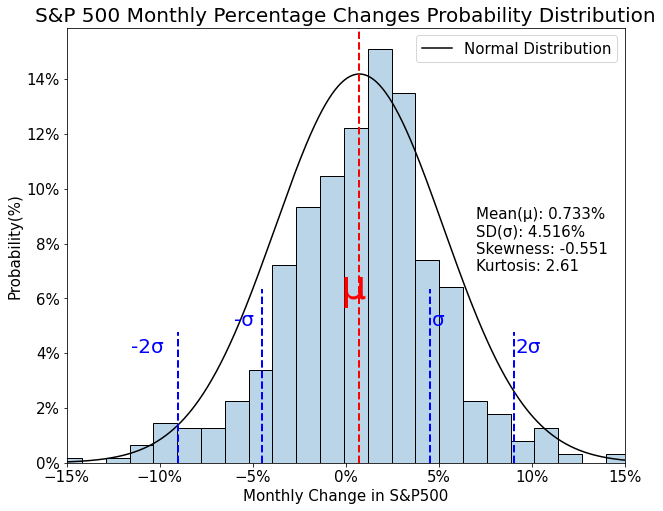

In [775]:
# use seaborn to display the histogram with density curve overlay 
import seaborn as sns
import matplotlib.ticker as mtick

def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(sp500, kde=False, bins=30, stat='probability', alpha=.3, ax=ax)

x = np.linspace(-.2, .2, 1000)
normal_dist_list = normal_dist(x, mean=sp500.mean(), sd=sp500.std())
plt.plot(x, normal_dist_list, label= "Normal Distribution", c='k')

plt.axvline(x=sp500.mean(), c='r', linestyle='--', lw=2)
plt.axvline(x=sp500.std(), ymax=.4, c='b', linestyle='--', lw=2)
plt.axvline(x=-sp500.std(), ymax=.4, c='b', linestyle='--', lw=2)
plt.axvline(x=2 * sp500.std(), ymax=.3, c='b', linestyle='--', lw=2)
plt.axvline(x=-2 * sp500.std(), ymax=.3, c='b', linestyle='--', lw=2)
ax.set_xbound(lower=-0.15, upper=0.15)
plt.text(sp500.mean() - .01, .060, 'μ', c='r', size=40)
plt.text(sp500.std() + .001, .05, 'σ', c='b', size=20)
plt.text(-sp500.std() - .015, .05, '-σ', c='b', size=20)
plt.text(2 * sp500.std() + .001, .04, '2σ', c='b', size=20)
plt.text(-2 * sp500.std() - .025, .04, '-2σ', c='b', size=20)
plt.xlabel("Monthly Change in S&P500")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
plt.ylabel("Probability(%)")
plt.title("S&P 500 Monthly Percentage Changes Probability Distribution", size=20)
plt.text(
    .07, .070,
    "Mean(μ): "+str(np.round(sp500.mean() * 100, decimals=3)) +'%\nSD(σ): ' +
    str(np.round(sp500.std() * 100, decimals=3))+'%\nSkewness: '+
    str(np.round(sp500.skew(), decimals=3))+'\nKurtosis: '+
    str(np.round(sp500.kurtosis(), decimals=3)), size=15)
plt.legend()

#### Standard Normal Distribution

A **Standard Normal Distribution** is defined as a normal distribution with $\mu = 0$, $\sigma = 1$, kurtosis = 3, and skew = 0. This usually defines the distribution of differences between the means of two random samples drawn from the same population. The mothly S&P500 data follows a normal distribution, but not a standard normal distribution. 

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is

$b(x; n, p) = {n \choose x}p^xq^{n-x}$

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

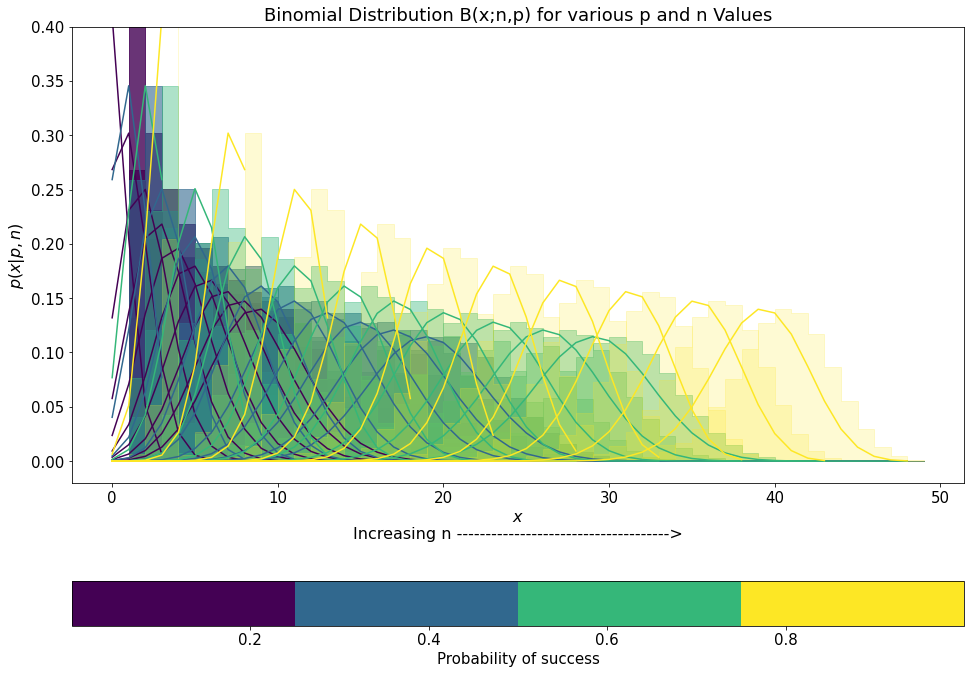

In [728]:
import math
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

# build binomial function
def binomial(x, n, p):
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n - x)) * p**x * (1 - p)**(n - x)


fig, ax = plt.subplots(figsize=(16, 12))

cmap = cm.get_cmap('viridis', 4)
norm = Normalize(vmin=0, vmax=1)
p = np.arange(.2, .81, .2)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for p in np.arange(.2, .81, .2):
    for n in range(5, 51, 5):
        binom_vars = [binomial(x, n, p) for x in range(1, n)]
        plt.plot(binom_vars, alpha=1, c=cmap(norm(p)))
        plt.fill_between(x=[x for x in range(1, n)],
                         y1=binom_vars,
                         step='post',
                         alpha=1-p,
                         color=cmap(norm(p)))
plt.colorbar(sm,
             orientation="horizontal",
             ticks=np.arange(.2, .81, .2),
             label="Probability of success")
ax.set_ybound(upper=.4)
plt.xlabel("$x$\nIncreasing n ------------------------------------->", fontsize=16)
plt.ylabel("$p(x | p, n)$", fontsize=16)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.show()

# This plot is way overkill. Was mostly experimenting to see if I could make anything look good. A plot possibly more appropriate is shown below: 



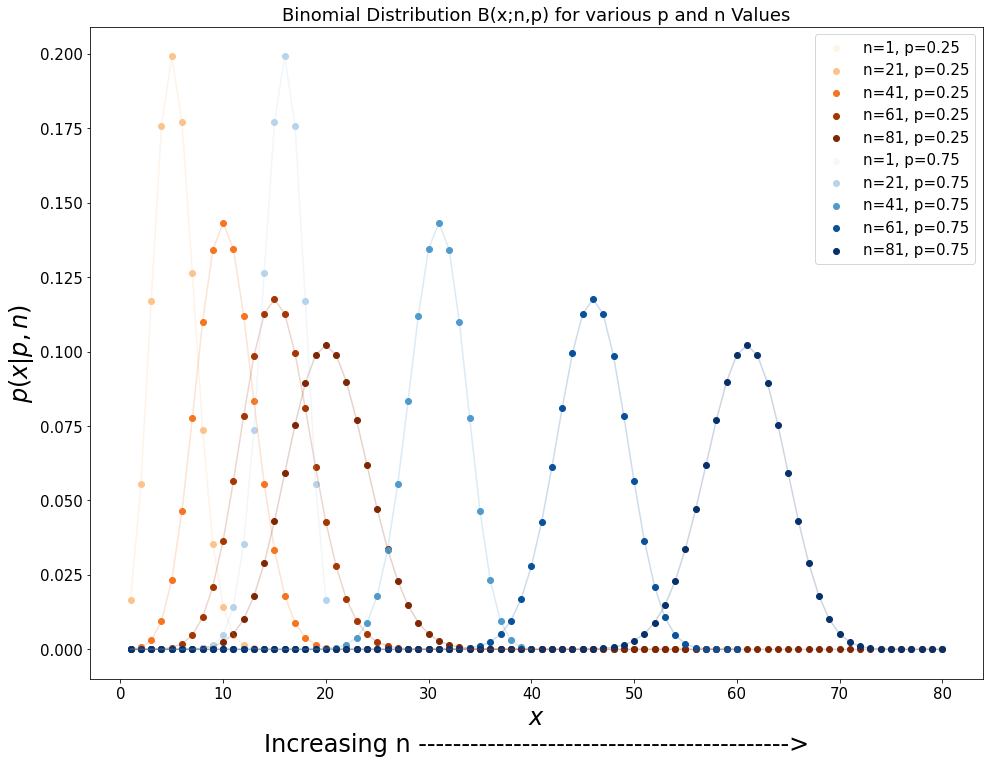

In [733]:
fig, ax = plt.subplots(figsize=(16, 12))

cmap = cm.get_cmap('Oranges')
norm = Normalize(vmin=0, vmax=70)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for p in np.arange(.25, .76, .5):
    if p == .25: cmap = cmap
    else: cmap = cm.get_cmap('Blues')
    for n in range(1, 101, 20):
        binom_vars = [binomial(x, n, p) for x in range(1, n)]
        plt.scatter([x for x in range(1, n)], binom_vars, alpha=1, color=cmap(norm(n)), label=f"n={n}, p={p}")
        plt.plot([x for x in range(1, n)], binom_vars, alpha=.2, color=cmap(norm(n)))

plt.xlabel("$x$\nIncreasing n ------------------------------------------->", fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()
plt.show()

As we can see from the distributions, the mean of each binomial distribution $\mu$ is $np$

##### T Distributions
All of the t-distributions below are normal distributions. As the degrees of freedom increases past 30 or so, the distribution becomes the _standard normal distribution_, which has a standard deviation of 1 and mean of 0, and we use z-scores to analyze this. 

__The $t$ value tells us how many standard deviations away from the mean our sample sits on a $t$ distribution of the _differences_ of these two means, where the mean of the distribution is zero.__
The t-distribution changes based on sample size, as increased sample size allows for higher _degrees of freedom_, which are defined for two samples as: 

- $df = (N_1 + N_2)  – 2$

And for a single sample as: 

- $df = N - 1$

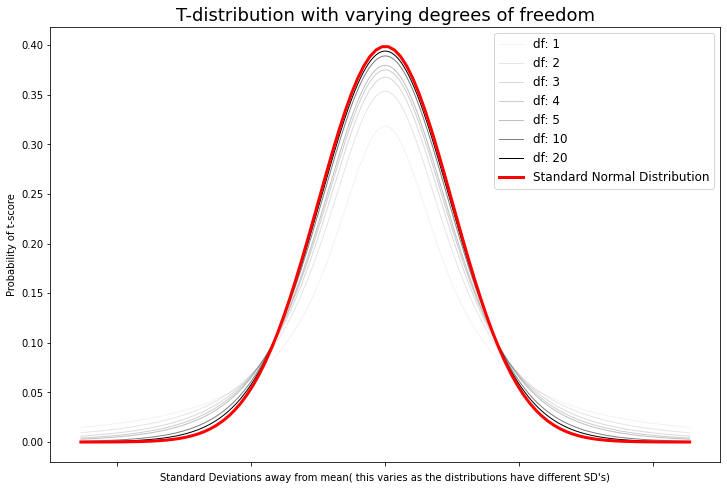

In [92]:
import numpy as np
from scipy.stats import t

fig, ax = plt.subplots(figsize=(12, 8))
t_df = [1, 2, 3, 4, 5, 10, 20]
for df in t_df:
    x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 1000)
    ax.plot(x, t.pdf(x, df), '-', lw=1, alpha=df/20,  label = "df: "+ str(df), color='k')
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1000), lw=3, alpha=1, color = 'r',  label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel("Standard Deviations away from mean( this varies as the distributions have different SD's)")
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels = "")
plt.legend(fontsize=12)

In [ ]:
import pandas_datareader as web
import pandas as pd
import datetime as dt
import scipy.stats as stats

As we can see, a given change in unemployment from month to month since 1970 is normally distributed with a very slightly positive mean of 0.27%. Had we pulled the data in 2019, the mean would've been negative, but the still slightly higher-than-usual unemployment rate resulting from 2020-2021 causes our overall mean to be positive. 

In addition, we can show that our revenue data sampling distribution roughly follows a normal distribution: 

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
revenues_df['Pilot Store Revenues'].plot.hist(bins=5)

# Comparisons of Means

When dealing with a population of known parameters $\mu$ and $\sigma^2$, we can take any mean $\bar{X}$ gotten from a sample and determine the likelihood that the sample came from out known population, or a population with same mean as our known population. We do this using a z-score: 
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\sigma}$
    </font>
</h3>

### Central Limit Theorem:


If $\bar{X}$ is the mean of a random sample of size $n$ taken
from a population with mean $\mu$ and finite variance $\sigma^2$, then the limiting form of
the distribution of
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$
    </font>
</h3>

 as $\lim_{n \to \infty}$, is the *standard normal distribution* 
 
The gotten _z-score_ tells us how many standard deviations our sample mean $\bar{X}$ is from our population mean $\mu$.
 
 The normal approximation for $\bar{X}$ will generally be good if $n$ ≥ 30, provided the population distribution is not terribly skewed. If $n$ < 30, the approximation is good only if the population is not too different from a normal distribution and, as stated above, if the population is known to be normal, the sampling distribution of $\bar{X}$ will follow a normal distribution exactly, no matter how small the size of the samples.


So, for any sample with $n$ > 30, $\bar{x}$ can be substituted for $\mu$ and $s$ can be substituted for $\sigma$
 
This Z-test asunes that we have access to the population standard deviation and mean _or_ that $n$ is large enough (>30) for $s^2$ and $\bar{x}$ to be used as a reliable estimate for $\sigma^2$ and $\mu$. When these conditions do not hold, and we do not have a large enough sample or sufficient population data, we need another estimator.  
 

The __T-test__ is used when we are dealing with a population of unknown distribution, and would like to compare a given sample mean to one of three options: 

- **One Sample T-test:** The one sample t test compares the mean of your sample data to a known value. For example, you might want to know how your sample mean compares to the population mean, like our value of 120,000 for average mothly store revenue
<h3 align="center">
    <font size="7">
        $ t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 

- **Independent Samples T-test:** The The independent samples t test (also called the unpaired samples t test) is the most common form of the T test. It helps you to compare the means of two sets of data. This would be useful if we wanted to compare revenues with a sample from a different store franchise than our own. 
<h3 align="center">
    <font size="7">
        $ t = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1 - \mu_2)}{\sqrt{(s^2)_p[(1/n_1)+(1/n_2)]}}$
    </font>
    </h3> 
- **Paired Samples T-test:** A paired t test (also called a correlated pairs t-test, a paired samples t test or dependent samples t test) is where you run a t test on dependent samples. Dependent samples are essentially connected — they are tests on the same person or thing. This would be useful if we chose a random sample of stores and measured their mean revenues before and after implementation of the new marketing campaign as our two means. For ths test, new terms are used, $\bar{d}$,  $\delta$, and $s_d$. $\bar{d}$ represents the average difference between $x_i1$ and $x_i2$, $s_d$ is the standard error of $\bar{d}$, and  $\delta$ is the hypothesized difference value being tested between the two means. It is usually 0.  
<h3 align="center">
    <font size="10">
        $ t = \frac{\bar{d} - \delta}{\frac{s_d}{\sqrt{n}}}$
    </font>
    </h3> 
    
Where...
<h3 align="center">
    <font size="3">
        $ \bar{d} = \sum_{i=1}^{n} d_i$
    </font>
    </h3> 
And...
<h3 align="center">
    <font size="3">
        $ s_d = \sqrt{\frac{\sum_{i=1}^{n} (d_i-\bar{d})^2}{n-1}}$
    </font>
    </h3> 

<span style="color:red">
    <font size = "5">
Progress as of 11/15
        </span>


In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.stats import t
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
t_df = [1, 2, 3, 4, 5, 10, 20]
for df in t_df:
    x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 1000)
    ax.plot(x, t.pdf(x, df), '-', lw=1, alpha=df/20,  label = "df: "+ str(df), color='k')
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1000), lw=3, alpha=1, color = 'r',  label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel("Standard Deviations away from mean( this varies as the distributions have different SD's)")
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels = "")
plt.legend()

### T-distribution p-value

As we can see, a lower sample size, and hence a lower degrees of freedom, leads to a lower probaility that our t-score is near 0 when our population means are the same, because more random variation is likely when the sample size is so low. The point of a t-score is to determine if the difference in the two means of the samples is too drastic for the true population means to be the same. As we approacch 30 with our degrees of freedom, the graph doesnt change much, and this is a standard normal distribution, which the z-score uses. That is why we use z-score for large sample sizes. 

Once we get our t-score based on the t-distribution, shown on the x-axis of the above graph, we get a corresponding __p-value__, shown on the y-axis. This value is the probability of our gotten t-value if the true means were the same. 

- If the corresponding p-value from our t-value is too low, we choose to __reject the null hypothesis $H_o$__, and say that our samples come from different populations who's means are different. This is a "statistically significant" result. 


- If the p-value is sufficiently high, we __fail to reject the null hypothesis $H_o$__, and say that there is a high enough chance that the samples came from populations with the same means. This is a "statistically insignificant" result. 


- The value at which a non-significant result becomes a significant one is called the __*critical value*__, denoted $\alpha$, and is most commonly 0.05. For a two-tailed t-test, where we want to know if one sample is either significantly higher or lower than the other, we will choose to reject $H_o$ if our t-value falls within the outer 2.5% of our distribution(.025*2 = .05), which would result in a p-value of less thanm .05 for a two-tailed t-test. 

Let's return to our example of company starting salary to see if we can make an educated inference about whether or not one company actually has a higher starting salary than the other. 

In [ ]:
import pandas as pd

# create dataframe to store randomly collected salary data
salary_data = pd.DataFrame()
a = salary_data["Company A"] = [
    100, 146, 138, 126, 125, 129, 110, 123, 155, 106
]
b = salary_data["Company B"] = [
    118, 145, 139, 118, 106, 121, 109, 106, 131, 139
]
salary_data

In [ ]:
stats.ttest_ind(a, b, alternative="two-sided")

Our test gave us results of $t = 0.363$ and $p = 0.721$. 


This tells us: 
- This result was only 0.363 standard deviations from the mean of the t-distribution, which is very close. 
- There is a 0.721 probability that this result would occur if the true difference between the sample means was zero. This is very high and means that we fail to reject our null hypothesis that the mean salary of the two companies is probably the same or close to it. 


# ANOVA 